In [24]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import random

%matplotlib inline
plt.style.use('ggplot')

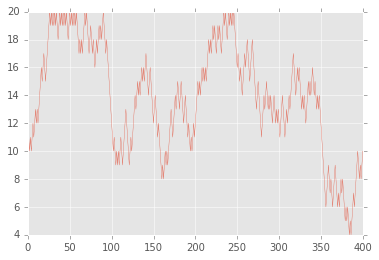

In [60]:
niters= 400
x0=10
List = [x0]
for i in range(niters):
    if x0==20:
        next = x0-1
        List = List+[next]
        x0=next
    elif x0==0:
        next = x0+1
        List = List+[next]
        x0=next
    else:
        next = x0+1 if np.random.random()>=0.5 else x0-1
        List = List+[next]
        x0=next

plt.plot(List,linewidth=0.3)

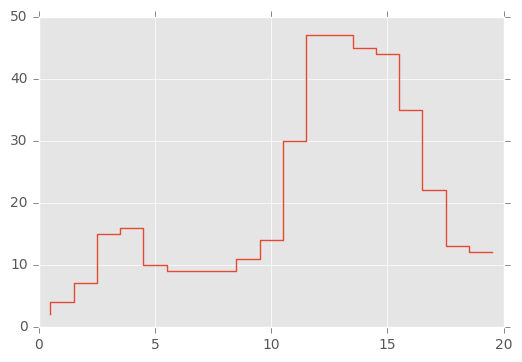

In [4]:
hist0, bin_edges0 = np.histogram(List, bins=20, normed=False)
factor = 1.0
bin_centers0 = (bin_edges0[:-1] + bin_edges0[1:]) / 2.

bin_width0= bin_edges0[1]-bin_edges0[0]



plt.step(bin_centers0, factor*hist0, linewidth=1)



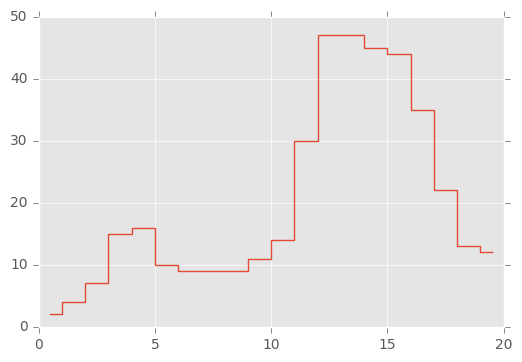

In [5]:
plt.plot(bin_centers0, hist0, drawstyle='steps-mid', linestyle='-', alpha=1,)

[0, 20, 0, 40]

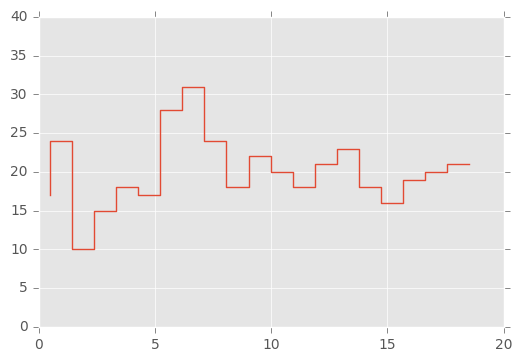

In [6]:
List2=[np.random.randint(0,20) for i in range(niters)]
hist2, bin_edges2 = np.histogram(List2, bins=20, normed=False)
factor = 1.0
bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2.

bin_width2= bin_edges2[1]-bin_edges2[0]

plt.step(bin_centers2, factor*hist2, linewidth=1)
plt.axis([0,20,0,40])

In [7]:
def MHhistogram(ninters, initial):
    x0=initial
    List = [x0]
    for i in range(niters):
        if x0==20:
            next = x0-1
            List = List+[next]
            x0=next
        elif x0==0:
            next = x0+1
            List = List+[next]
            x0=next
        else:
            next = x0+1 if np.random.random()>=0.5 else x0-1
            List = List+[next]
            x0=next

    hist0, bin_edges0 = np.histogram(List, bins=20, normed=False)
    bin_centers0 = (bin_edges0[:-1] + bin_edges0[1:]) / 2.

    bin_width0= bin_edges0[1]-bin_edges0[0]



    return bin_centers0, hist0




In [120]:
MHhistogram(400, 10)

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
         18.5,  19.5]),
 array([ 2,  4,  7,  9, 10, 10, 13, 24, 27, 24, 27, 25, 23, 22, 24, 24, 19,
        20, 25, 62]))

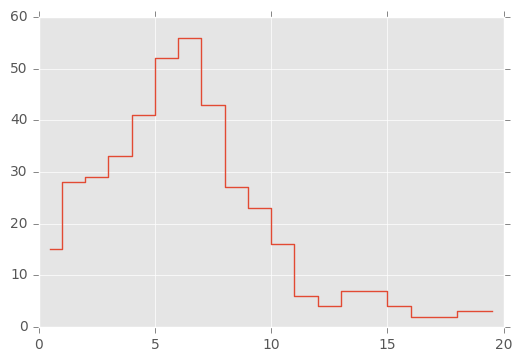

In [8]:
plt.plot(MHhistogram(1400, 10)[0],MHhistogram(1400, 10)[1],drawstyle='steps-mid', linestyle='-', alpha=1,)

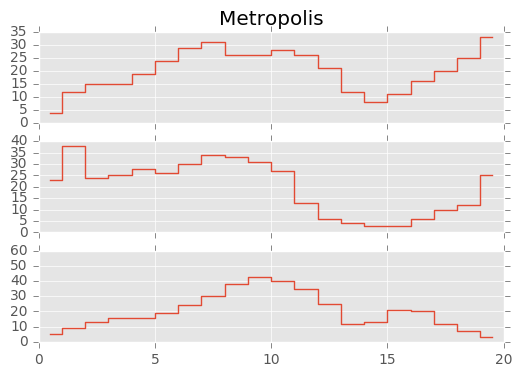

In [31]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
ax1.plot(MHhistogram(100, 10)[0],MHhistogram(100, 10)[1], drawstyle='steps-mid', linestyle='-', alpha=1)
ax1.set_title('Metropolis')
plt.axis([0,20,0,60])
ax2.plot(MHhistogram(400, 10)[0],MHhistogram(400, 10)[1], drawstyle='steps-mid', linestyle='-', alpha=1)
ax3.plot(MHhistogram(1200, 10)[0],MHhistogram(1200, 10)[1], drawstyle='steps-mid', linestyle='-', alpha=1)

In [20]:
def randomhistogram(niters):
    List2=[np.random.randint(0,20) for i in range(niters)]
    hist2, bin_edges2 = np.histogram(List2, bins=20, normed=False)
    bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2.
    return bin_centers2, hist2


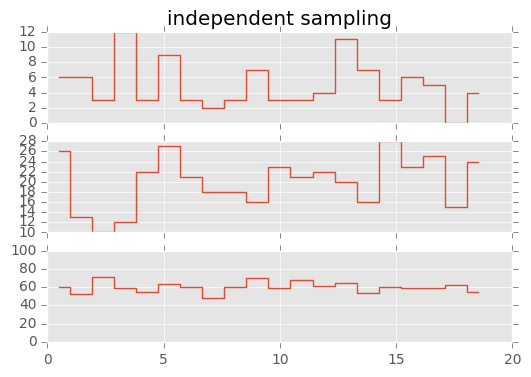

In [32]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
ax1.plot(randomhistogram(100)[0],randomhistogram(100)[1], drawstyle='steps-mid', linestyle='-', alpha=1)
ax1.set_title('independent sampling')
plt.axis([0,20,0,100])
ax2.plot(randomhistogram(400)[0],randomhistogram(400)[1], drawstyle='steps-mid', linestyle='-', alpha=1)
ax3.plot(randomhistogram(1200)[0],randomhistogram(1200)[1], drawstyle='steps-mid', linestyle='-', alpha=1)

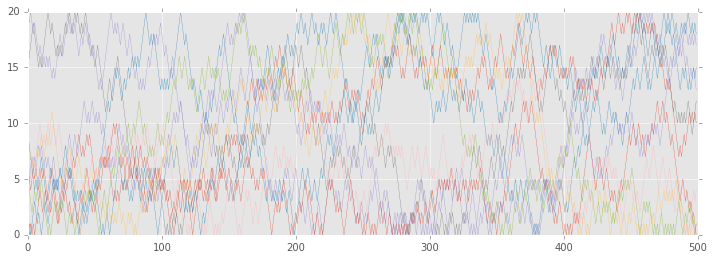

In [24]:
niters= 500
n_sample = 10
List = np.zeros((niters, n_sample))

for i in range(n_sample):
    List[0][i] = random.randint(0,20)

for i in range(niters-1):
    for j in range(n_sample):
        x0 = List[i][j]
        if x0 == 20:
            next = x0 - 1
            List[i+1][j] = next
        elif x0 == 0:
            next = x0 + 1
            List[i+1][j] = next
        else:
            next = x0+1 if np.random.random()>=0.5 else x0-1
            List[i+1][j] = next
plt.figure(figsize=(12,4))
plt.plot(List,linewidth=0.3)
plt.show()

In [26]:
for j in range(n_sample):
    for k in range(n_sample):
        for i in range(niters-1):
            if j != k and List[i,j] == List[i,k]:
                List[i+1,j] = List[i+1,k]

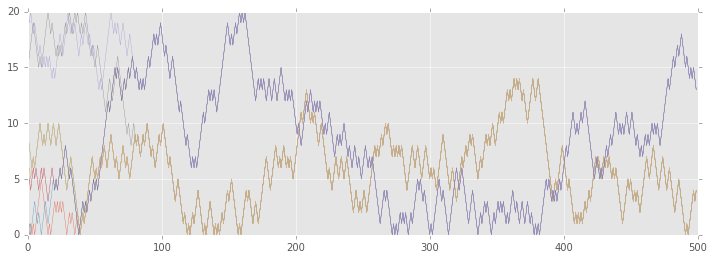

In [27]:
plt.figure(figsize=(12,4))
plt.plot(List,linewidth=0.3)
plt.show()

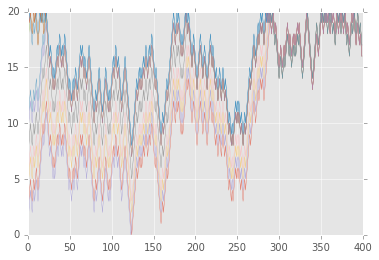

In [63]:
niters= 400
n_sample = 10
List = np.zeros((niters, n_sample))

for i in range(n_sample):
    List[0][i] = random.randint(0,20)
init = List[0]

for i in range(niters-1):
    single_generator= np.random.random()
    for j in range(n_sample):
        x0 = List[i][j]
        if x0 == 20:
            next = x0 - 1
            List[i+1][j] = next
        elif x0 == 0:
            next = x0 + 1
            List[i+1][j] = next
        else:
            next = x0+1 if single_generator>=0.5 else x0-1
            List[i+1][j] = next

plt.plot(List,linewidth=0.3)
plt.show()

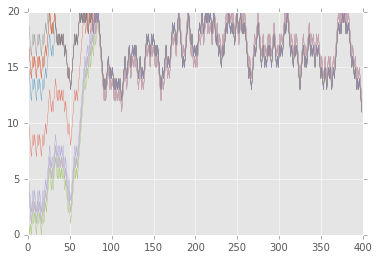

In [28]:
niters= 400
n_sample = 10
List = np.zeros((niters, n_sample))

for i in range(n_sample):
    List[0][i] = random.randint(0,20)
init = List[0]

for i in range(niters-1):
    single_generator= np.random.random()
    for j in range(n_sample):
        x0 = List[i][j]
        if x0 == 20:
            next = x0 - 1
            List[i+1][j] = next
        elif x0 == 0:
            next = x0 + 1
            List[i+1][j] = next
        else:
            next = x0+1 if single_generator>=0.5 else x0-1
            List[i+1][j] = next

plt.plot(List,linewidth=0.3)
plt.show()

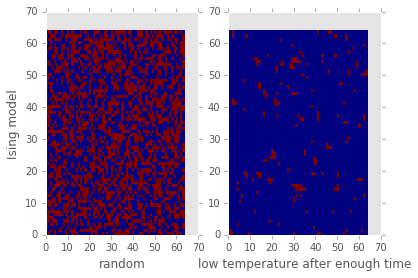

In [30]:
#low T

# J = 1 ferromagnetism 

l = 64
T = 2.0
beta = 1/T

s= np.ones((l,l))

for i in range(l):
    for j in range(l):
        if random.random() > 0.5:
            s[i,j] = -s[i,j]
plt.subplot(1,2,1)
plt.pcolor(s)
plt.ylabel('Ising model')
plt.xlabel('random')
           
turns = 0

dE = np.zeros((l,l))
while turns < 300:
    turns = turns + 1
    for i in range(l):
        for j in range(l):
            dE[i,j] =  0.5 * 2 * s[i,j]*(s[(i-1)%l,j]+s[(i+1)%l,j]+s[i,(j-1)%l]+s[i,(j+1)%l])
            if dE[i,j]  < 0 or random.random() < np.exp(-2*beta* dE[i,j]):
                s[i,j] = - s[i,j]
plt.subplot(1,2,2)                
plt.pcolor(s)
plt.xlabel('low temperature after enough time')

In [ ]:
#low T

# J = 1 ferromagnetism 

l = 64
T = 2.0
beta = 1/T

s= np.ones((l,l))

for i in range(l):
    for j in range(l):
        if random.random() > 0.5:
            s[i,j] = -s[i,j]
plt.subplot(1,2,1)
plt.pcolor(s)
plt.ylabel('Ising model')
plt.xlabel('random')
           
turns = 0

dE = np.zeros((l,l))
while turns < 300:
    turns = turns + 1
    for i in range(l):
        for j in range(l):
            dE[i,j] =  0.5 * 2 * s[i,j]*(s[(i-1)%l,j]+s[(i+1)%l,j]+s[i,(j-1)%l]+s[i,(j+1)%l])
            if dE[i,j]  < 0 or random.random() < np.exp(-2*beta* dE[i,j]):
                s[i,j] = - s[i,j]
plt.subplot(1,2,2)                
plt.pcolor(s)
plt.xlabel('low temperature after enough time')

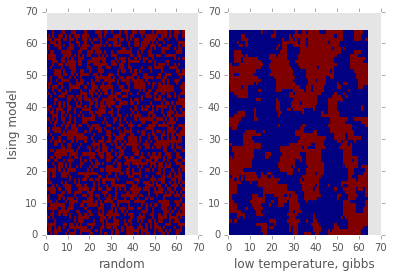

In [27]:
l = 64
T = 2.0
beta = 1/T

s= np.ones((l,l))

for i in range(l):
    for j in range(l):
        if random.random() > 0.5:
            s[i,j] = -s[i,j]
            
            
plt.subplot(1,2,1)
plt.pcolor(s)
plt.ylabel('Ising model')
plt.xlabel('random')            
            
def a(i,j,l):
    return (s[(i-1)%l,j]+s[(i+1)%l,j]+s[i,(j-1)%l]+s[i,(j+1)%l])

turns = 0

while turns < 10:
    turns = turns +1
    for i in range(l):
        for j in range(l):
            u = random.random()
            P = 1/(1+np.exp(-2*beta*a(i,j,l)))
            if u < P:
                s[i,j] = 1
            else:
                s[i,j] = -1
                
plt.subplot(1,2,2)                
plt.pcolor(s)
plt.xlabel('low temperature, gibbs')

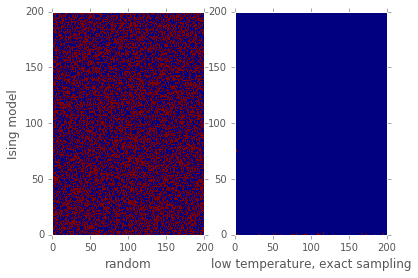

In [62]:
l = 200
T = 2.0
beta = 1/T

s= np.ones((l,l))

for i in range(l):
    for j in range(l):
        if random.random() > 0.5:
            s[i,j] = -s[i,j]
            
            
plt.subplot(1,2,1)
plt.pcolor(s)
plt.ylabel('Ising model')
plt.xlabel('random')            
            
def a(i,j,l):
    return (s[(i-1)%l,j]+s[(i+1)%l,j]+s[i,(j-1)%l]+s[i,(j+1)%l])

turns = 0

while turns < 1:
    turns = turns +1
    u = random.random()
    for i in range(l):
        for j in range(l):
            P = 1/(1+np.exp(-2*beta*a(i,j,l)))
            if u < P:
                s[i,j] = 1
            else:
                s[i,j] = -1
                
plt.subplot(1,2,2)                
plt.pcolor(s)
plt.xlabel('low temperature, exact sampling')

In [63]:
sum(sum(s))

-39826.0